# <b>Sales Forecasting Project - Master Notebook</b>

##  Objectives 

This project aims to develop a **Sales Forecasting System** powered by data analysis and machine learning techniques, in order to achieve the following objectives:

* **Analyze historical data** related to sales, customers, and discounts to uncover hidden patterns and relationships.
* **Support managerial decision-making** by providing insights that help anticipate demand, manage inventory, and optimize pricing strategies.
* **Address influencing factors** such as discounts, seasonality, and different sales periods (monthly, quarterly, yearly).
* **Build a Real-Time Forecasting Model** that can accurately predict future sales.
* **Improve operational efficiency** and reduce risks associated with inaccurate sales estimations.


# Section 1: Import Libraries
----------- ------------
##### Add any other libraries you need (XGBoost, Prophet, LightGBM, etc.)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Section 2: Load Dataset
----------- ------------

In [2]:
# 1. Load the dataset
file_path = "car_sales_2018_2024.csv"
df_dirty = pd.read_csv(file_path)

# Make a copy to work on
df = df_dirty.copy()

# Section 3: Data Cleaning
----------- ------------
#### - Handle missing values
#### - Remove duplicates
#### - Handle Data Type Issues
#### - Handle Formatting Issues
#### - Handle outliers


In [4]:
print("Initial Shape:", df.shape)
display(df.head())
df.info()
df.describe(include="all")

Initial Shape: (1010668, 22)


,Date,Salesperson,Customer Name,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,...,Discount,Payment Method,Commission Rate,Commission Earned,Sales Region,Sale Year,Sale Month,Sale Quarter,Day of Week,Season
0,2022-09-28,Victor Flores,Joshua Williams,37.0,Female,Audi,Q7,2018.0,2.0,121564.56,...,0.01,Lease,0.06,7293.87,Tennessee,2020.0,September,3.0,NaN,Fall
1,NaN,Amy Peterson,Raymond Bates,44.0,Female,Toyota,Corolla,2019.0,2.0,69110.68,...,0.11,Loan,0.11,7602.17,Alaska,2023.0,April,2.0,Sunday,Spring
2,2021-12-09,Sharon Smith,Rebecca Stevens,32.0,Male,Ford,Explorer,2019.0,2.0,89993.72,...,0.07,Cash,0.05,4499.69,NaN,2024.0,December,4.0,Thursday,Winter
3,2023-12-28,Robin Cantrell,Michael Rice,69.0,Male,NaN,Telluride,2021.0,2.0,49921.52,...,0.09,Cash,0.06,2995.29,Wyoming,2021.0,December,4.0,Thursday,Winter
4,2023-09-14,Matthew Gross,Ricky Gordon,55.0,Female,Kia,Sorento,2020.0,1.0,24205.00,...,0.09,Lease,0.08,1936.40,Minnesota,2018.0,September,3.0,Thursday,Fall


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010668 entries, 0 to 1010667
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               960159 non-null  object 
 1   Salesperson        956397 non-null  object 
 2   Customer Name      945531 non-null  object 
 3   Customer Age       946578 non-null  float64
 4   Customer Gender    947440 non-null  object 
 5   Car Make           949493 non-null  object 
 6   Car Model          950469 non-null  object 
 7   Car Year           949597 non-null  float64
 8   Quantity           940810 non-null  float64
 9   Sale Price         948499 non-null  float64
 10  Cost               954332 non-null  float64
 11  Profit             957090 non-null  float64
 12  Discount           951066 non-null  float64
 13  Payment Method     946922 non-null  object 
 14  Commission Rate    946228 non-null  float64
 15  Commission Earned  954031 non-null  float64
 16  

,Date,Salesperson,Customer Name,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,...,Discount,Payment Method,Commission Rate,Commission Earned,Sales Region,Sale Year,Sale Month,Sale Quarter,Day of Week,Season
count,960159,956397,945531,946578.000000,947440,949493,950469,949597.000000,940810.000000,9.484990e+05,...,951066.000000,946922,946228.000000,954031.000000,949413,941866.000000,943383,956079.000000,953617,946790
unique,2557,100,318194,NaN,2,51,50,NaN,NaN,NaN,...,NaN,3,NaN,NaN,50,NaN,12,NaN,7,4
top,2019-04-27,Nancy Mercado,Michael Smith,NaN,Male,Toyota,S-Class,NaN,NaN,NaN,...,NaN,Cash,NaN,NaN,Minnesota,NaN,January,NaN,Monday,Spring
freq,442,19357,465,NaN,473980,88593,19315,NaN,NaN,NaN,...,NaN,316221,NaN,NaN,19232,NaN,80505,NaN,136931,238290
mean,NaN,NaN,NaN,45.022431,NaN,NaN,NaN,2020.998550,2.121261,8.659924e+04,...,0.059975,NaN,0.071188,5606.979807,NaN,2022.020002,NaN,2.508975,NaN,NaN
std,NaN,NaN,NaN,14.730197,NaN,NaN,NaN,1.998923,0.608191,1.689590e+05,...,0.037568,NaN,0.017443,3576.630905,NaN,1.773994,NaN,1.118119,NaN,NaN
min,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,2018.000000,1.000000,9.508000e+03,...,0.000000,NaN,0.030000,0.000000,NaN,2018.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,2019.000000,2.000000,5.496180e+04,...,0.030000,NaN,0.060000,3286.800000,NaN,2021.000000,NaN,2.000000,NaN,NaN
50%,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,2021.000000,2.000000,7.389904e+04,...,0.060000,NaN,0.070000,4987.720000,NaN,2022.000000,NaN,3.000000,NaN,NaN
75%,NaN,NaN,NaN,58.000000,NaN,NaN,NaN,2023.000000,3.000000,1.073051e+05,...,0.090000,NaN,0.080000,7413.340000,NaN,2024.000000,NaN,4.000000,NaN,NaN


In [5]:
# Visualize missingness
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Date                 50509
Salesperson          54271
Customer Name        65137
Customer Age         64090
Customer Gender      63228
Car Make             61175
Car Model            60199
Car Year             61071
Quantity             69858
Sale Price           62169
Cost                 56336
Profit               53578
Discount             59602
Payment Method       63746
Commission Rate      64440
Commission Earned    56637
Sales Region         61255
Sale Year            68802
Sale Month           67285
Sale Quarter         54589
Day of Week          57051
Season               63878
dtype: int64


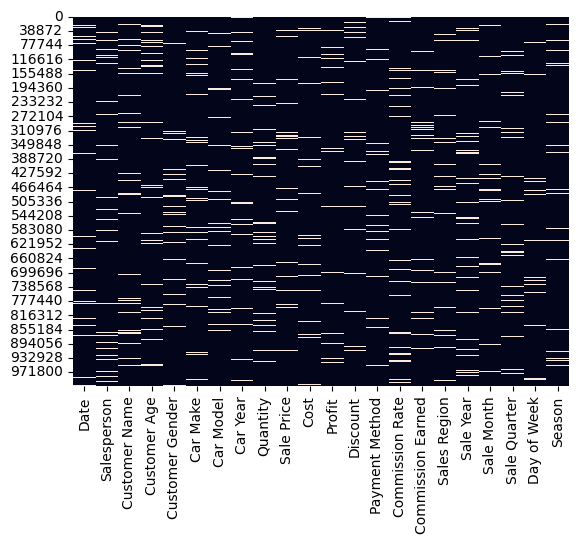

In [6]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [7]:
# Handle missing values
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())  # numeric => median
    else:
        df[col] = df[col].fillna(df[col].mode()[0])  # categorical => mode

print("After fixing missing values:")
print(df.isnull().sum())

After fixing missing values:
Date                 0
Salesperson          0
Customer Name        0
Customer Age         0
Customer Gender      0
Car Make             0
Car Model            0
Car Year             0
Quantity             0
Sale Price           0
Cost                 0
Profit               0
Discount             0
Payment Method       0
Commission Rate      0
Commission Earned    0
Sales Region         0
Sale Year            0
Sale Month           0
Sale Quarter         0
Day of Week          0
Season               0
dtype: int64


In [8]:
# 2. Remove duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 10000


In [9]:
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")

Duplicates removed.
Number of duplicate rows: 0


In [10]:
# 4. Check Data Type Issues
df.dtypes

Date                  object
Salesperson           object
Customer Name         object
Customer Age         float64
Customer Gender       object
Car Make              object
Car Model             object
Car Year             float64
Quantity             float64
Sale Price           float64
Cost                 float64
Profit               float64
Discount             float64
Payment Method        object
Commission Rate      float64
Commission Earned    float64
Sales Region          object
Sale Year            float64
Sale Month            object
Sale Quarter         float64
Day of Week           object
Season                object
dtype: object

In [70]:
# Date: object to datetime64
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [12]:
# Car Year: float64 to Int64 (nullable int)
df["Car Year"] = df["Car Year"].astype("Int64")

In [13]:
# Sale Year: float64 to Int64
df["Sale Year"] = df["Sale Year"].astype("Int64")

In [14]:
# Sale Quarter: float64 to Int64
df["Sale Quarter"] = df["Sale Quarter"].astype("Int64")

In [15]:
# Sale Month: object to Categorical
df["Sale Month"] = df["Sale Month"].astype("category")

# Add a new numeric column for months (1–12)
month_map = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}
df["Sale Month Num"] = df["Sale Month"].map(month_map)


In [16]:
# 5. Formatting Issues
print(df["Car Make"].unique())

['Audi' 'Toyota' 'Ford' 'Kia' 'Honda' 'Chevrolet' 'Mercedes' 'BMW'
 'Nissan' 'mercedes' ' chevrolet ' ' ford ' 'Hyundai' ' nan ' 'nissan'
 ' Honda ' 'HONDA' 'MERCEDES' 'TOYOTA' ' Audi ' ' kia ' ' nissan '
 ' toyota ' 'chevrolet' 'kia' 'FORD' 'bmw' 'HYUNDAI' ' Chevrolet ' 'ford'
 'NISSAN' 'audi' 'hyundai' 'CHEVROLET' 'toyota' ' bmw ' ' Mercedes '
 ' BMW ' ' Hyundai ' ' Ford ' 'AUDI' 'Bmw' ' honda ' ' Toyota ' 'KIA'
 ' Kia ' ' Nissan ' ' audi ' ' mercedes ' ' hyundai ' 'honda']


In [17]:
print(df["Car Model"].unique())

['Q7' 'Corolla' 'Explorer' 'Telluride' 'Sorento' 'Camry' 'Pilot' 'Tahoe'
 'E-Class' '5 Series' 'RAV4' 'Mustang' 'S-Class' 'X5' 'Highlander' 'Prius'
 'A6' 'C-Class' 'A4' 'Sportage' 'GLC' 'X3' 'Accord' 'Pathfinder' 'Escape'
 'Q5' 'Altima' 'Elantra' '7 Series' 'GLE' 'Equinox' 'CR-V' 'Odyssey'
 'Maxima' 'Sonata' 'Silverado' 'Malibu' 'Forte' 'Rogue' 'Sentra' 'A8'
 'Santa Fe' 'Civic' 'F-150' 'Kona' 'Optima' 'Focus' 'Camaro' '3 Series'
 'Tucson']


In [18]:
print(df["Sales Region"].unique())

['Tennessee' 'Alaska' 'Minnesota' 'Wyoming' 'Connecticut' 'Washington'
 'Indiana' 'Oklahoma' 'Iowa' 'Mississippi' 'Arizona' 'Michigan' 'Colorado'
 'North Carolina' 'Alabama' 'Ohio' 'West Virginia' 'Rhode Island'
 'Nebraska' 'Delaware' 'Florida' 'Massachusetts' 'Utah' 'New Hampshire'
 'Kentucky' 'Missouri' 'Virginia' 'Hawaii' 'Idaho' 'Maryland' 'Vermont'
 'South Carolina' 'Kansas' 'California' 'South Dakota' 'New Jersey'
 'Texas' 'Louisiana' 'New Mexico' 'Pennsylvania' 'Maine' 'Illinois'
 'Wisconsin' 'New York' 'Oregon' 'Georgia' 'Arkansas' 'Nevada'
 'North Dakota' 'Montana']


In [19]:
df["Car Make"] = df["Car Make"].str.strip()
df["Car Make"] = df["Car Make"].str.title()
df["Car Make"].replace(["Nan", "NaN", ""], np.nan, inplace=True)
df = df.dropna(subset=["Car Make"])
print(df["Car Make"].unique())

C:\Users\kira\AppData\Local\Temp\ipykernel_14428\3241117990.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Car Make"].replace(["Nan", "NaN", ""], np.nan, inplace=True)


['Audi' 'Toyota' 'Ford' 'Kia' 'Honda' 'Chevrolet' 'Mercedes' 'Bmw'
 'Nissan' 'Hyundai']


In [20]:
df.dtypes

Date                 datetime64[ns]
Salesperson                  object
Customer Name                object
Customer Age                float64
Customer Gender              object
Car Make                     object
Car Model                    object
Car Year                      Int64
Quantity                    float64
Sale Price                  float64
Cost                        float64
Profit                      float64
Discount                    float64
Payment Method               object
Commission Rate             float64
Commission Earned           float64
Sales Region                 object
Sale Year                     Int64
Sale Month                 category
Sale Quarter                  Int64
Day of Week                  object
Season                       object
Sale Month Num             category
dtype: object

In [21]:
# 6. Outliers Detection
numeric_cols = ['Car Year', 'Quantity', 'Sale Price' , 'Cost', 'Profit', 'Discount', 'Commission Rate', 'Commission Earned' , 'Sale Quarter', 'Sale Year']

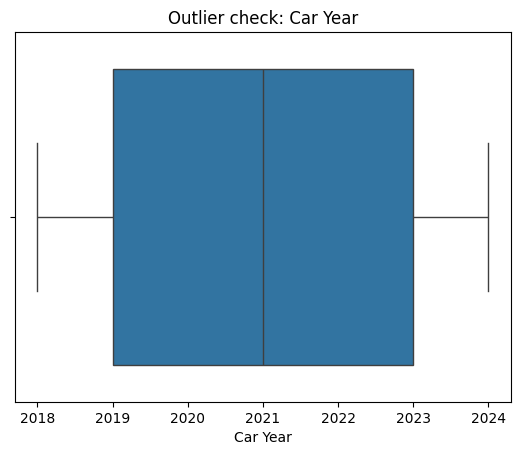

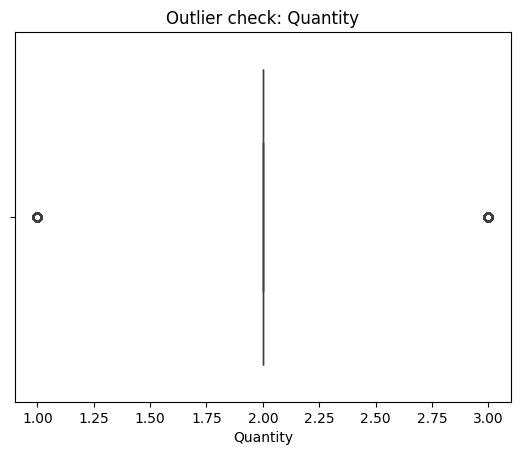

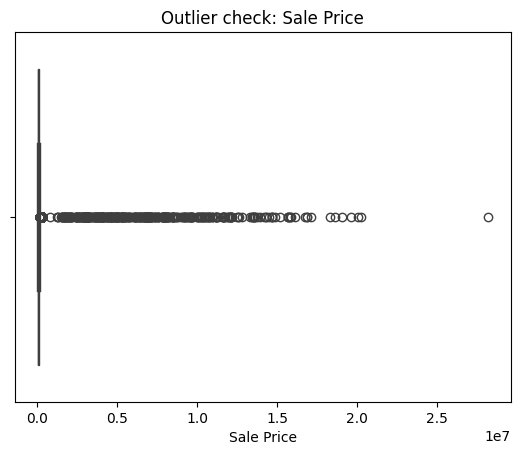

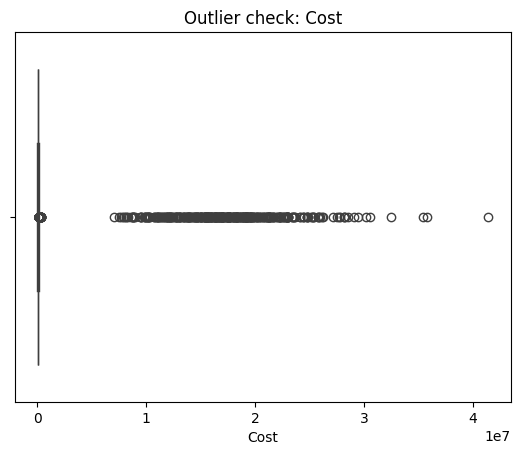

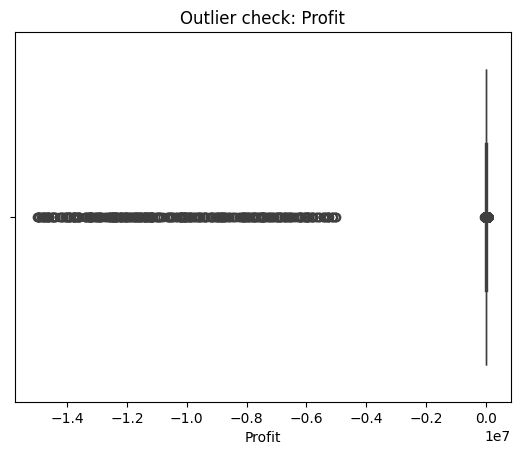

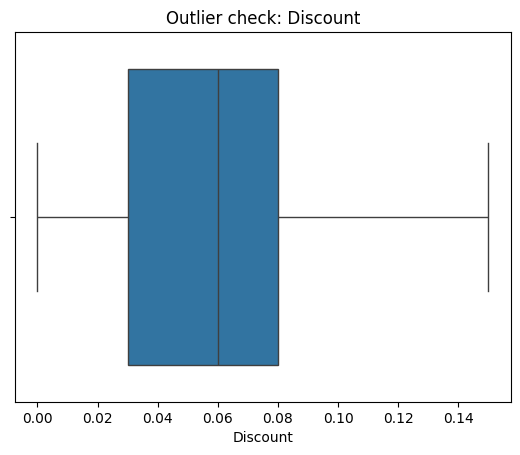

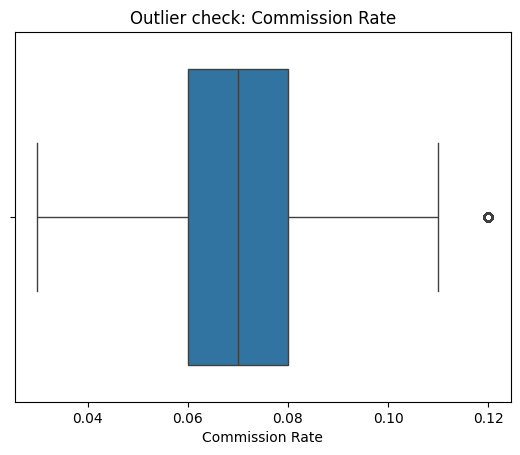

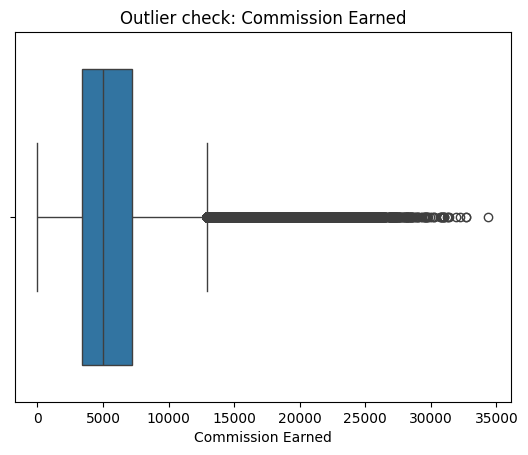

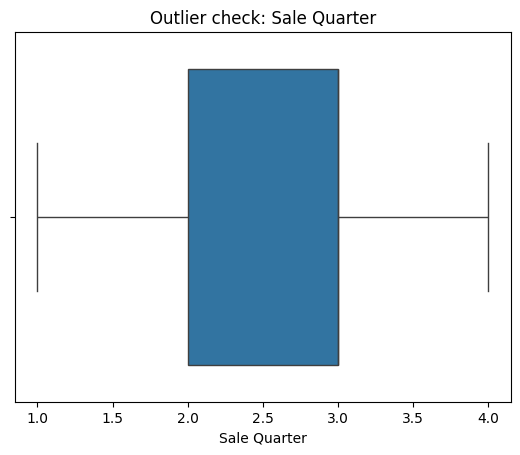

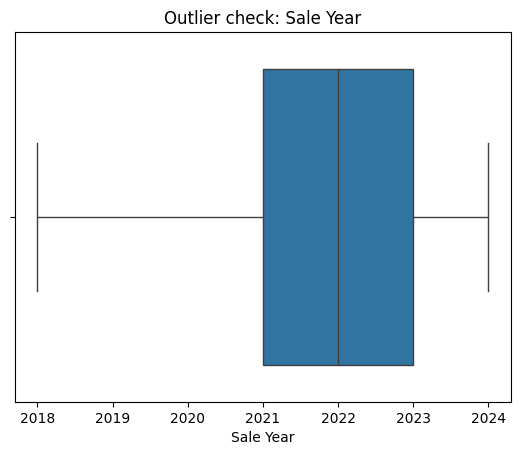

In [22]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outlier check: {col}")
    plt.show()

In [24]:
print(df['Profit'].describe())

count    9.872850e+05
mean     1.399785e+04
std      2.093609e+05
min     -1.499900e+07
25%      8.750260e+03
50%      1.567051e+04
75%      2.490229e+04
max      9.047493e+04
Name: Profit, dtype: float64


In [25]:
print(df['Commission Earned'].describe())

count    987285.000000
mean       5572.792255
std        3478.107496
min           0.000000
25%        3394.940000
50%        4987.720000
75%        7220.230000
max       34384.900000
Name: Commission Earned, dtype: float64


In [26]:
print(df['Cost'].describe())

count    9.872850e+05
mean     7.187236e+04
std      3.512683e+05
min      6.969890e+03
25%      4.451010e+04
50%      5.932858e+04
75%      8.128660e+04
max      4.139586e+07
Name: Cost, dtype: float64


In [27]:
print("\n Top 10 Largest Profits:")
largest_profits = df.nlargest(10, 'Profit')[['Sale Price', 'Cost', 'Profit']]
print(largest_profits)

print("\n Top 10 Smallest Profits (Most Negative):")
smallest_profits = df.nsmallest(10, 'Profit')[['Sale Price', 'Cost', 'Profit']]
print(smallest_profits)


 Top 10 Largest Profits:
        Sale Price       Cost    Profit
997028   301583.10  211108.17  90474.93
106913   301184.52  210829.16  90355.36
831778    73899.04  207981.77  89135.05
574013    73899.04  207863.29  89084.27
646921   291192.72  203834.90  87357.82
920192   290873.31  203611.32  87261.99
843574   290856.93  203599.85  87257.08
793234   290114.37  203080.06  87034.31
205850   290043.39  203030.37  87013.02
235932   289680.30  202776.21  86904.09

 Top 10 Smallest Profits (Most Negative):
        Sale Price         Cost       Profit
361256  9397587.47  24396583.00 -14998995.53
545643  4444639.55  19437766.24 -14993126.69
912866  9735434.46  24708126.73 -14972692.27
660637  7260871.98  22233521.24 -14972649.26
916552  3776915.90  18728409.47 -14951493.57
765608    73899.04  19806186.12 -14934834.41
784819  4278278.04  19212398.14 -14934120.10
865227  9960699.11  24834361.76 -14873662.65
153769  7307196.38  22142520.32 -14835323.94
189413  3503191.05  18317329.69 -14814138

In [28]:
print( df.nlargest(10, 'Sale Price')[['Sale Price', 'Salesperson' , 'Profit']])

          Sale Price      Salesperson       Profit
599710   28211594.77    Rachel Garcia -13184268.60
90725    20251407.41  Cynthia Simmons  -7437309.06
135900   20073215.87      Carl Molina -12394924.80
338105   19654384.20       Erin Colon  -9454826.92
81186    19066790.44     Blake Watson -10170069.75
708029   18605298.95   Glenn Ferguson  -8898462.08
707231   18303811.71     Sarah Cooper -10209356.92
617369   17115710.79   Crystal Kaiser -13064884.94
1004102  16871594.85     Karen Newton -12566975.23
358195   16860988.58     Sarah Gibson -11253666.63


In [29]:
Outliers = ['Profit', 'Sale Price', 'Cost']

In [30]:
# Remove outliers using IQR
for col in Outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

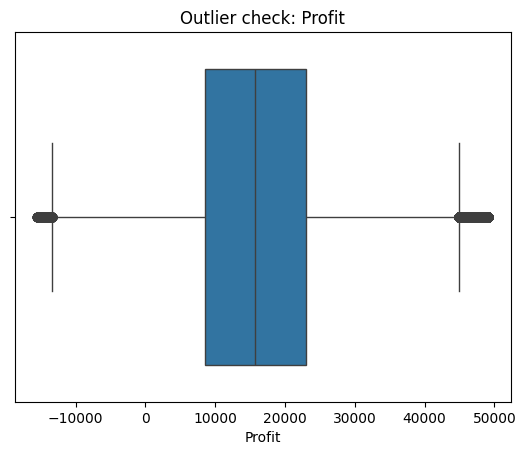

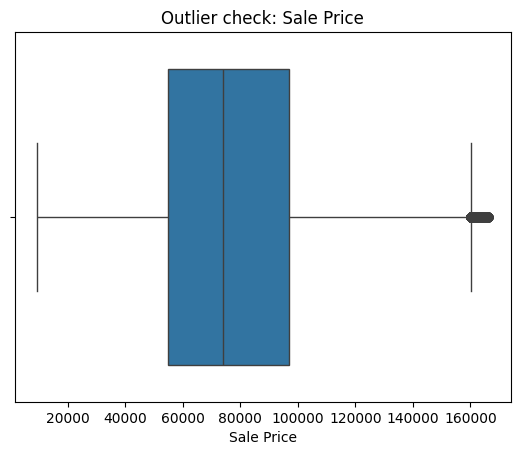

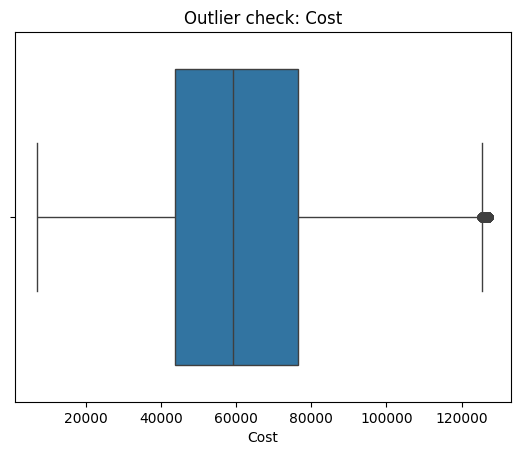

In [31]:
for col in Outliers:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outlier check: {col}")
    plt.show()

In [34]:
# If the profit is negative, we will consider it a loss.
df['Loss'] = df['Profit'].apply(lambda x: abs(x) if x < 0 else 0)

In [35]:
# if the profit is positive, it remains a profit.
df['Profit_Clean'] = df['Profit'].apply(lambda x: x if x > 0 else 0)

In [36]:
# Remove outliers based on domain knowledge
salesperson_counts = df["Salesperson"].value_counts()

In [37]:
print("Top 10 Salespersons by number of sales:")
print(salesperson_counts.head(10))

Top 10 Salespersons by number of sales:
Salesperson
Nancy Mercado      67492
Eileen Callahan    17760
Sharon Smith       17754
David Hernandez    17744
Thomas Morrow      17740
David Mullen       17732
Lori Jacobs        17722
Robin Cantrell     17696
Jill Jones         17663
Melanie Pham       17661
Name: count, dtype: int64


In [39]:
df = df[df["Salesperson"] != "Nancy Mercado"]

In [40]:
salesperson_counts = df["Customer Name"].value_counts()

In [41]:
print("Top 10 Salespersons by number of sales:")
print(salesperson_counts.head(10))

Top 10 Salespersons by number of sales:
Customer Name
Michael Smith        55684
Michael Johnson        324
James Smith            277
David Smith            270
Jennifer Smith         257
John Smith             239
Michael Williams       235
Christopher Smith      227
James Johnson          216
Robert Smith           212
Name: count, dtype: int64


In [42]:
df = df[df["Customer Name"] != "Michael Smith"]

In [43]:
# 7. Final Check
print("Final Shape:", df.shape)
df.info()
df.describe(include="all")

Final Shape: (803990, 25)
<class 'pandas.core.frame.DataFrame'>
Index: 803990 entries, 0 to 1010665
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               803990 non-null  datetime64[ns]
 1   Salesperson        803990 non-null  object        
 2   Customer Name      803990 non-null  object        
 3   Customer Age       803990 non-null  float64       
 4   Customer Gender    803990 non-null  object        
 5   Car Make           803990 non-null  object        
 6   Car Model          803990 non-null  object        
 7   Car Year           803990 non-null  Int64         
 8   Quantity           803990 non-null  float64       
 9   Sale Price         803990 non-null  float64       
 10  Cost               803990 non-null  float64       
 11  Profit             803990 non-null  float64       
 12  Discount           803990 non-null  float64       
 13  Payment Method     803

,Date,Salesperson,Customer Name,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,...,Commission Earned,Sales Region,Sale Year,Sale Month,Sale Quarter,Day of Week,Season,Sale Month Num,Loss,Profit_Clean
count,803990,803990,803990,803990.000000,803990,803990,803990,803990.0,803990.000000,803990.000000,...,803990.000000,803990,803990.0,803990,803990.0,803990,803990,803990.0,803990.000000,803990.000000
unique,NaN,49,292334,NaN,2,10,50,<NA>,NaN,NaN,...,NaN,50,<NA>,12,<NA>,7,4,12.0,NaN,NaN
top,NaN,Eileen Callahan,Michael Johnson,NaN,Male,Toyota,S-Class,<NA>,NaN,NaN,...,NaN,Minnesota,<NA>,January,<NA>,Monday,Spring,1.0,NaN,NaN
freq,NaN,16618,324,NaN,427518,129839,60091,<NA>,NaN,NaN,...,NaN,64194,<NA>,117543,<NA>,154484,240237,117543.0,NaN,NaN
mean,2021-05-23 02:57:39.893780224,NaN,NaN,45.024681,NaN,NaN,NaN,2020.997297,2.068857,77193.993298,...,5229.399808,NaN,2021.970602,NaN,2.535273,NaN,NaN,NaN,233.616015,16796.603855
min,2018-01-01 00:00:00,NaN,NaN,20.000000,NaN,NaN,NaN,2018.0,1.000000,9508.000000,...,0.000000,NaN,2018.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000
25%,2019-06-22 00:00:00,NaN,NaN,33.000000,NaN,NaN,NaN,2019.0,2.000000,54968.000000,...,3346.985000,NaN,2021.0,NaN,2.0,NaN,NaN,NaN,0.000000,8511.527500
50%,2021-04-26 00:00:00,NaN,NaN,45.000000,NaN,NaN,NaN,2021.0,2.000000,73899.040000,...,4987.720000,NaN,2022.0,NaN,3.0,NaN,NaN,NaN,0.000000,15670.510000
75%,2023-02-27 00:00:00,NaN,NaN,57.000000,NaN,NaN,NaN,2023.0,2.000000,97008.000000,...,6813.350000,NaN,2023.0,NaN,3.0,NaN,NaN,NaN,0.000000,23080.240000
max,2024-12-31 00:00:00,NaN,NaN,70.000000,NaN,NaN,NaN,2024.0,3.000000,166229.600000,...,20242.190000,NaN,2024.0,NaN,4.0,NaN,NaN,NaN,15465.920000,49130.040000


In [44]:
# Save cleaned dataset
df.to_csv("car_sales_2018_2024_Cleaned.csv", index=False)
print(" Cleaned dataset saved")

 Cleaned dataset saved


In [45]:
df = pd.read_csv("car_sales_2018_2024_Cleaned.csv")

counts = df["Customer Name"].value_counts()

print(counts)

Customer Name
Michael Johnson    324
James Smith        277
David Smith        270
Jennifer Smith     257
John Smith         239
                  ... 
Gina Cline           1
Wesley Fields        1
Luis Dickerson       1
April Banks          1
Deborah Clarke       1
Name: count, Length: 292334, dtype: int64


# Section 4: Exploratory Data Analysis (EDA)
----------- ------------
#### - Basic statistics
#### - Visualizations (trends, seasonality, correlations,...)


In [3]:
df = pd.read_csv("car_sales_2018_2024_Cleaned.csv")

### Estimating Future Demand (Lag Features)
A powerful feature for forecasting inventory needs based on historical demand.

In [46]:
# Aggregate past sales per Car Make & Model per Month
monthly_sales = df.groupby(['Car Make','Car Model','Sale Month Num'])['Quantity'].sum().reset_index()
monthly_sales.rename(columns={'Quantity':'Monthly Demand'}, inplace=True)

In [48]:
top_cars_per_month = monthly_sales.loc[monthly_sales.groupby('Sale Month Num')['Monthly Demand'].idxmax()]
top_cars_per_month = top_cars_per_month.sort_values('Sale Month Num')
print(top_cars_per_month)

     Car Make   Car Model  Sale Month Num  Monthly Demand
1032   Toyota       Prius               1          5075.0
421   Hyundai      Tucson               2          2544.0
770    Toyota       Camry               3          2807.0
771    Toyota       Camry               4          2654.0
796    Toyota     Corolla               5          2766.0
1073   Toyota        RAV4               6          2738.0
1038   Toyota       Prius               7          2779.0
931    Toyota  Highlander               8          2795.0
776    Toyota       Camry               9          2671.0
1041   Toyota       Prius              10          2794.0
1078   Toyota        RAV4              11          2643.0
779    Toyota       Camry              12          2869.0


<b>Potential Insights:</b>

- Predict inventory requirements for the next month based on the previous month's sales.

- Identify trends for specific car models.

### Profitability by Discount Bracket
- Identify the optimal discount level for maximizing profitability.
- Actionable Improvement: Fine-tune discount strategies for different car models or seasons.


In [50]:
# Create discount bins
df['Discount_Bracket'] = pd.cut(df['Discount'], bins=[0, 0.05, 0.1, 0.2, 0.5, 1], labels=['0-5%','5-10%','10-20%','20-50%','50%+'], include_lowest=True)
profit_by_discount = df.groupby('Discount_Bracket')['Profit'].mean()
print(profit_by_discount)

Discount_Bracket
0-5%      15768.212585
5-10%     16009.371645
10-20%    21966.391752
20-50%             NaN
50%+               NaN
Name: Profit, dtype: float64


C:\Users\kira\AppData\Local\Temp\ipykernel_14428\3403411952.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_discount = df.groupby('Discount_Bracket')['Profit'].mean()


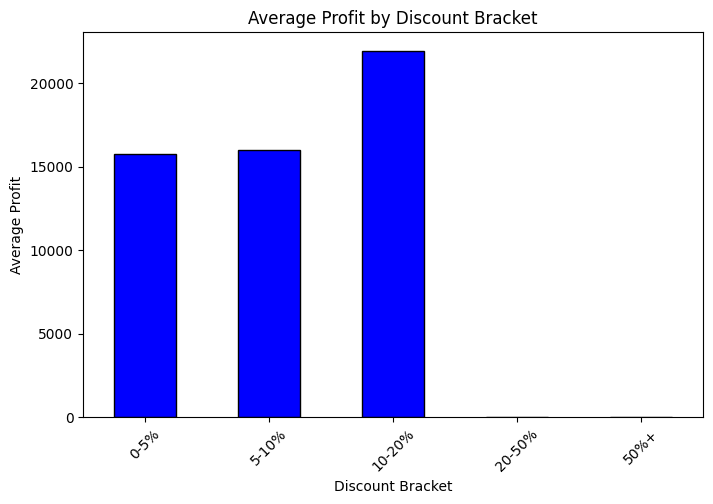

In [51]:
profit_by_discount.plot(kind='bar', figsize=(8,5), color='blue', edgecolor='k')

plt.title('Average Profit by Discount Bracket')
plt.xlabel('Discount Bracket')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()

<b>Insight:</b> 
Most sales happen within the 0–20% discount range. Interestingly, the 10–20% discount bracket generates the highest profit, which suggests that slightly higher discounts encourage more purchases and increase overall profitability. Since there are no sales recorded in the 20–50% or 50%+ brackets, it seems the dealership rarely (if ever) gives such large discounts. This indicates that targeted promotions in the 10–20% discount range could be an effective strategy to boost sales while maintaining strong profit margins.

### Seasonal Demand Analysis
- Identify which season sees the highest total sales volume.
- Actionable Improvement: Ramp up marketing campaigns and inventory before peak seasons.

In [53]:
seasonal_demand = df.groupby('Season')['Quantity'].sum()  # Using sum to see total volume per season
print(seasonal_demand)

Season
Fall      388245.0
Spring    497029.0
Summer    391781.0
Winter    386285.0
Name: Quantity, dtype: float64


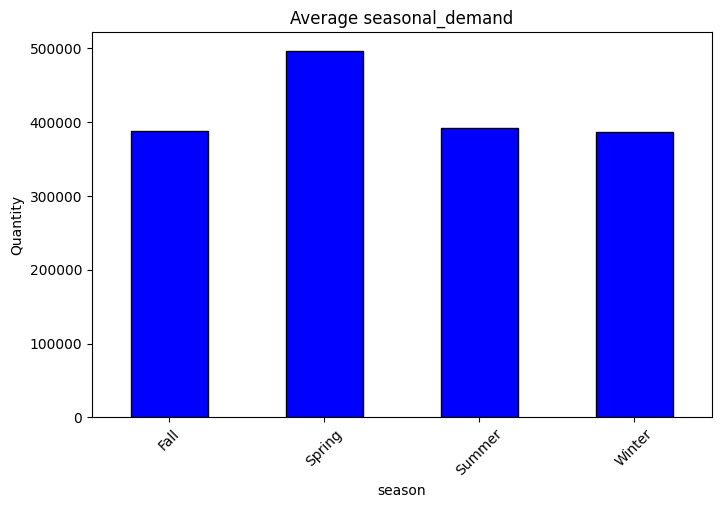

In [54]:
seasonal_demand.plot(kind='bar', figsize=(8,5), color='blue', edgecolor='k')

plt.title('Average seasonal_demand')
plt.xlabel('season')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

<b>Insight:</b> 

Car sales peak in Spring, suggesting higher customer demand during this season. The dealership could consider aligning promotions, marketing campaigns, and stock availability to maximize sales in Spring.

### Brand (Make) Performance: Sales vs. Profit
- Compare car brands based on their average sales quantity and total profit contribution.
- Actionable Improvement: Focus inventory and marketing efforts on the most profitable and popular brands.

In [60]:
make_performance = df.groupby('Car Make').agg(Quantity=('Quantity', 'sum'), Total_Profit=('Profit', 'sum'))
print(make_performance.sort_values('Total_Profit', ascending=False))

           Quantity  Total_Profit
Car Make                         
Bmw        129720.0  1.792236e+09
Mercedes   114236.0  1.758453e+09
Audi       134896.0  1.754714e+09
Toyota     272148.0  1.709092e+09
Ford       165563.0  1.358582e+09
Chevrolet  168792.0  1.215324e+09
Honda      169586.0  9.924381e+08
Nissan     169181.0  9.576776e+08
Hyundai    170349.0  8.978239e+08
Kia        168869.0  8.801367e+08


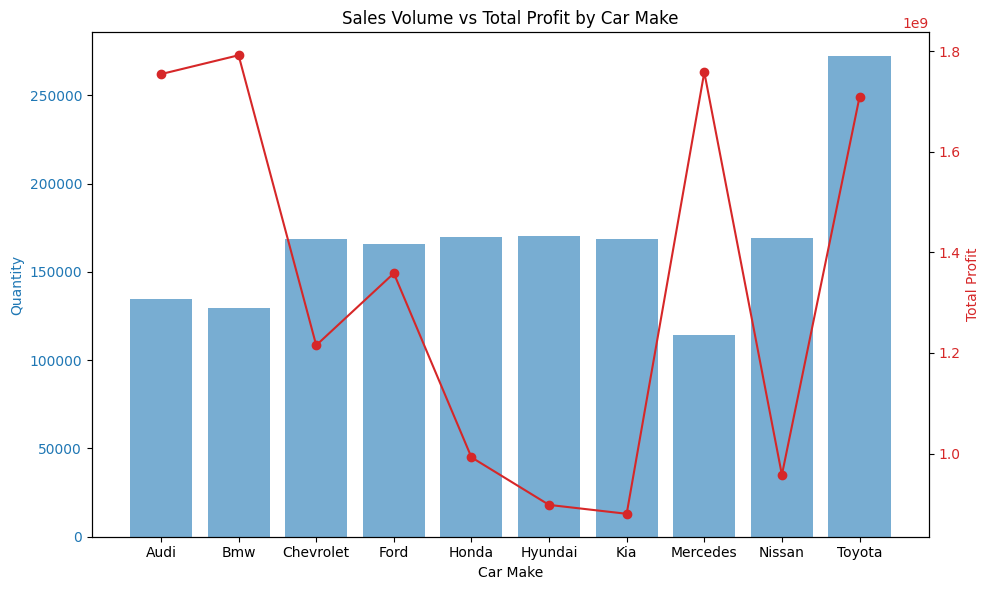

In [63]:
fig, ax1 = plt.subplots(figsize=(10,6))

# sales
color = 'tab:blue'
ax1.set_xlabel('Car Make')
ax1.set_ylabel('Quantity', color=color)
ax1.bar(make_performance.index, make_performance['Quantity'], color=color, alpha=0.6, label='Quantity')
ax1.tick_params(axis='y', labelcolor=color)

# profits
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Profit', color=color)
ax2.plot(make_performance.index, make_performance['Total_Profit'], color=color, marker='o', label='Total Profit')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sales Volume vs Total Profit by Car Make')
fig.tight_layout()
plt.show()

<b>Insight:</b> 


Toyota achieves the highest sales volume (252,164 cars sold) but lags behind premium brands like BMW, Audi, and Mercedes in total profit. This suggests that Toyota relies on high-volume, lower-margin sales, while luxury brands generate higher profits per unit despite selling fewer cars.

### Trend of Average Profit over Time

In [72]:
profit_trend = df.groupby(df['Date'].dt.to_period("M"))['Profit'].mean().reset_index()
profit_trend['Date'] = profit_trend['Date'].dt.to_timestamp()

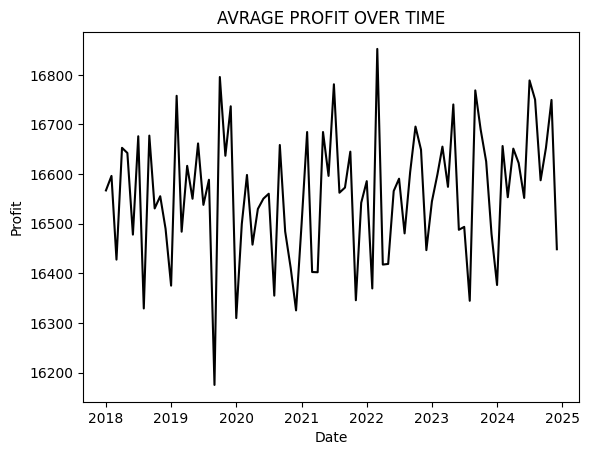

In [75]:
sns.lineplot(x='Date',y='Profit',data=profit_trend,color='black')
plt.title("AVRAGE PROFIT OVER TIME")
plt.show()

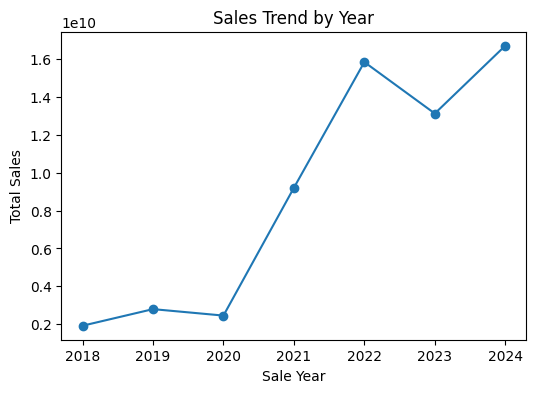

In [76]:
df.groupby('Sale Year')['Sale Price'].sum().plot(kind="line", marker='o', figsize=(6,4))
plt.title("Sales Trend by Year")
plt.ylabel("Total Sales")
plt.show()


<b>The Core Business Question</b>

This leads us to a critical question in business analysis: Why are sales growing exponentially while profits remain flat and volatile?

There are several potential explanations for this scenario, and the data invites a deeper investigation:

- Increasing Costs: The cost of acquiring these sales (Cost of cars Sold, marketing expenses, wages, etc.) might be rising at the same rate as or even faster than sales revenue. You are selling more, but you are also spending more, resulting in a stagnant or shrinking profit margin.
Pricing and Discounting Strategy: The company might be relying on heavy discounts or aggressive pricing strategies to drive sales volume. While this boosts total revenue (Sales), it erodes the profit made on each individual transaction.

- Product Mix Shift: The company may have started selling a higher volume of low-margin products.This would increase overall sales figures but would not contribute equally to profitability.
Costs of Scaling: Rapid growth often requires significant investment in infrastructure, new employees, and technology. These scaling costs can consume profits in the short term.

- Proposed Solution: A Profitability Enhancement Strategy
The data reveals a clear disconnect between revenue growth and profitability. To address this, a strategic initiative focused on margin improvement is essential. The goal is to ensure that the impressive sales growth translates into healthy profit growth.
Here is a proposed multi-step solution:

<b>Phase 1:</b> Diagnostic Analysis (Identify the "Why")
Conduct a Full Cost Structure Analysis: Break down all costs into fixed, variable, and semi-variable categories.Analyze how each cost component has trended over time in relation to sales growth. This will pinpoint exactly where costs are increasing.
Analyze Profitability by Product/Service: Don't just look at overall profit. Calculate the gross margin for each product line or service category.This will likely reveal that some products are highly profitable while others may even be loss leaders.
Review Pricing and Discounting Policies: Analyze the impact of promotions and discounts on both sales volume and net profit margin. Evaluate if the increase in volume justifies the reduction in margin.

<b>Phase 2:</b> Strategic Actions (Address the Issues)
Optimize the Product Mix: Strategically promote and incentivize the sale of high-margin products.Consider bundling high-margin items with lower-margin bestsellers to improve the overall profitability of a transaction.It may also be necessary to phase out or re-price products that consistently underperform.
Implement Strategic Cost Management: Based on the cost analysis, identify areas for operational efficiency. This could involve renegotiating supplier contracts, automating manual tasks to reduce labor costs, or optimizing inventory management to reduce holding costs.
Refine the Pricing Strategy: Move away from a purely volume-driven sales approach. Implement a value-based pricing strategy that reflects the quality and benefits of your products. Consider creating pricing tiers (e.g., good/better/best) to capture a wider range of customers while protecting margins.

###  Monthly Model Popularity Trends

- Observe how demand for specific models fluctuates throughout the year.
  
- Actionable Improvement: Plan targeted marketing and inventory stocking for specific models ahead of their peak demand months.

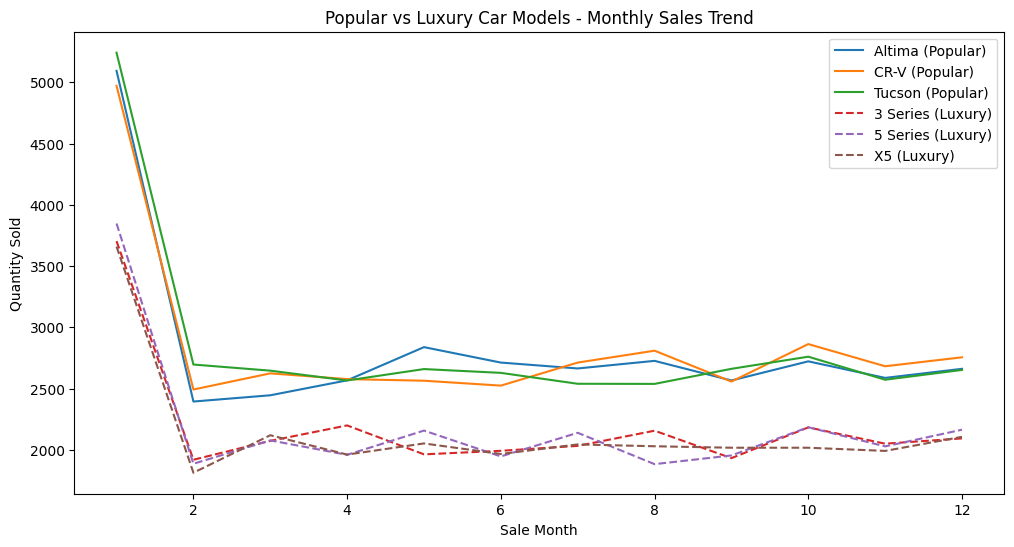

In [79]:
monthly_model_trend = pd.pivot_table(df, values='Quantity', index='Sale Month Num', columns='Car Model', aggfunc='sum', fill_value=0)

popular_models = ['Altima', 'CR-V', 'Tucson']
luxury_models = ['3 Series', '5 Series', 'X5']

plt.figure(figsize=(12,6))

# Popular models (Solid lines)
for model in popular_models:
    plt.plot(monthly_model_trend.index, monthly_model_trend[model], label=f"{model} (Popular)", linestyle='-')

# Luxury models (Dashed lines)
for model in luxury_models:
    plt.plot(monthly_model_trend.index, monthly_model_trend[model], label=f"{model} (Luxury)", linestyle='--')

plt.title("Popular vs Luxury Car Models - Monthly Sales Trend")
plt.xlabel("Sale Month")
plt.ylabel("Quantity Sold")
plt.legend()
plt.show()


<b>Insight:</b> 

##### When comparing popular models (Altima, CR-V, Tucson) with luxury models (3 Series, 5 Series, X5):

- Popular models consistently outsell luxury models across almost all months  indicating that affordability and demand for practical vehicles drive higher sales volumes.

- Luxury models show more stable but lower sales, reflecting their niche market and higher pricing, which makes them less frequently purchased compared to mass-market cars.

- Seasonal fluctuations are more visible in popular models (larger spikes and dips in sales), while luxury models remain relatively flat, suggesting that popular cars are more influenced by consumer trends, promotions, or seasonal demand.

- This insight suggests that dealerships should focus promotions and inventory planning more aggressively on popular models, while luxury models can be positioned with premium marketing strategies targeting a stable but smaller audience.

###  Season & Car Make Profitability
- Understand which car brands are most profitable during which seasons.
- Actionable Improvement: Time promotional campaigns and inventory orders for specific brands to align with their most profitable seasons.

In [80]:
season_make_profit = pd.pivot_table(df, values='Profit', index='Season', columns='Car Make', aggfunc='sum', fill_value=0)
print(season_make_profit)

Car Make          Audi           Bmw     Chevrolet          Ford  \
Season                                                             
Fall      4.145289e+08  4.235266e+08  2.822550e+08  3.159498e+08   
Spring    5.265497e+08  5.395083e+08  3.660617e+08  4.090847e+08   
Summer    4.094371e+08  4.160519e+08  2.854890e+08  3.218783e+08   
Winter    4.041986e+08  4.131491e+08  2.815182e+08  3.116688e+08   

Car Make         Honda       Hyundai           Kia      Mercedes  \
Season                                                             
Fall      2.349773e+08  2.106611e+08  2.043282e+08  4.070306e+08   
Spring    2.924969e+08  2.646568e+08  2.620906e+08  5.275649e+08   
Summer    2.343944e+08  2.121645e+08  2.074286e+08  4.131353e+08   
Winter    2.305695e+08  2.103415e+08  2.062894e+08  4.107218e+08   

Car Make        Nissan        Toyota  
Season                                
Fall      2.265986e+08  3.959853e+08  
Spring    2.856231e+08  5.100113e+08  
Summer    2.261011e+08  4.

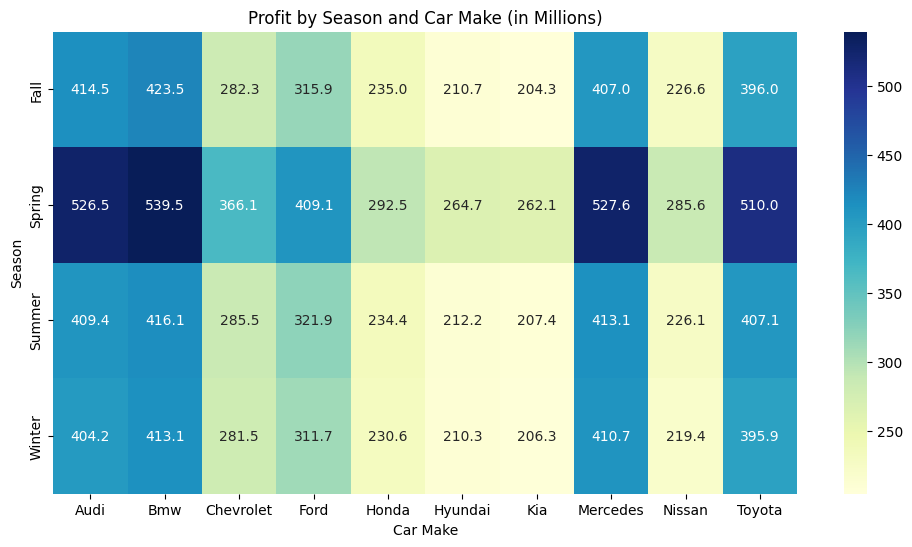

In [81]:
plt.figure(figsize=(12,6))
season_make_profit_million = season_make_profit / 1e6

sns.heatmap(season_make_profit_million, annot=True, fmt=".1f", cmap="YlGnBu")

plt.title("Profit by Season and Car Make (in Millions)")
plt.ylabel("Season")
plt.xlabel("Car Make")
plt.show()

<b>Insight:</b> 

- Spring is the peak season across almost all car brands, with significantly higher profits compared to other seasons.

- Premium brands like BMW, Audi, and Mercedes see strong seasonal gains in Spring, indicating higher demand for luxury vehicles during that time.

- Mass-market brands like Toyota, Ford, and Chevrolet also peak in Spring, but the increase is slightly less sharp than premium brands.

- Winter and Fall are the weakest seasons, where sales and profits drop consistently across all brands.

<b>Recommendation</b> for the dealership: Focus marketing campaigns and inventory buildup in Spring, especially for premium cars, while preparing promotions/discounts in Winter and Fall to stimulate demand.

# Section 5: Feature Engineering
----------- ------------
#### - Extract features from date (Year, Month, Day, Weekday, etc.)
#### - Encode categorical variables
#### - Scaling if needed


### Calculating Car Age
This feature is crucial for identifying which older or newer cars are in higher demand and understanding their impact on sales.

In [83]:
# Car Age
df['Car Age'] = df['Sale Year'] - df['Car Year']
df['Car Age'].describe()

count    803990.000000
mean          0.973304
std           2.597559
min          -6.000000
25%          -1.000000
50%           1.000000
75%           3.000000
max           6.000000
Name: Car Age, dtype: float64

 <b>Potential Insights:</b>

- Newer cars generally have higher demand.

- We can identify which models require higher stock levels based on their age.

In [84]:
invalid_car_age = df[df['Sale Year'] < df['Car Year']]
print(invalid_car_age.shape)

(227718, 27)


In [85]:
df.loc[df['Sale Year'] < df['Car Year'], 'Sale Year'] = df['Car Year']

In [86]:
df['Car Age'] = df['Sale Year'] - df['Car Year']
df['Car Age'].describe()

count    803990.000000
mean          1.607151
std           1.788197
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           6.000000
Name: Car Age, dtype: float64

### Calculating Profit Margin per Sale
This feature is key for identifying the most profitable sales and where the dealership should focus its promotions.

In [87]:
# Profit Margin
df['Profit Margin'] = df['Profit'] / df['Sale Price']
df['Profit Margin'].describe()

count    803990.000000
mean          0.204158
std           0.109014
min          -0.207201
25%           0.147470
50%           0.226861
75%           0.287402
max           1.621199
Name: Profit Margin, dtype: float64

In [88]:
df[df['Profit Margin'] < 0]
df[df['Profit Margin'] > 1]

,Date,Salesperson,Customer Name,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,...,Sale Month,Sale Quarter,Day of Week,Season,Sale Month Num,Loss,Profit_Clean,Discount_Bracket,Car Age,Profit Margin
46496,2021-03-14,Benjamin Beck,Samantha Fitzgerald,23.0,Male,Honda,Civic,2023,1.0,14829.0,...,March,1,Sunday,Spring,3,0.0,15670.51,0-5%,0,1.056748
55676,2023-08-18,Rebecca Smith,Tiffany Payne,59.0,Female,Kia,Optima,2024,2.0,15513.0,...,August,3,Friday,Summer,8,0.0,15670.51,5-10%,0,1.010153
89201,2021-07-28,Lynn Jenkins,Amanda Chavez,36.0,Male,Kia,Sorento,2024,1.0,9666.0,...,July,3,Wednesday,Summer,7,0.0,15670.51,0-5%,0,1.621199
110768,2021-04-07,Jill Jones,Amber Grant,52.0,Male,Kia,Optima,2021,1.0,14414.0,...,April,2,Wednesday,Spring,4,0.0,15670.51,0-5%,0,1.087173
136127,2023-06-02,Mary Simon,Kimberly Key,59.0,Female,Hyundai,Kona,2021,1.0,15465.0,...,June,2,Friday,Summer,6,0.0,15670.51,5-10%,0,1.013289
289810,2018-02-28,Richard Rogers,Vincent Brown,68.0,Female,Toyota,Prius,2019,1.0,13188.0,...,February,1,Wednesday,Winter,2,0.0,15670.51,0-5%,0,1.188240
487544,2018-04-15,Ralph Dunn,Pam Gordon,43.0,Male,Hyundai,Tucson,2023,1.0,14294.0,...,April,2,Sunday,Spring,4,0.0,15670.51,0-5%,0,1.096300
494463,2024-11-03,Timothy Wheeler,Christine Baker,60.0,Female,Hyundai,Santa Fe,2020,2.0,15593.0,...,November,4,Sunday,Fall,11,0.0,15670.51,5-10%,0,1.004971
497639,2022-01-10,Ralph Dunn,Ryan Williams,68.0,Female,Nissan,Maxima,2020,1.0,15633.0,...,January,1,Monday,Winter,1,0.0,15670.51,5-10%,0,1.002399
523967,2018-07-11,Chris Johnson,Alyssa Wilson,70.0,Male,Hyundai,Santa Fe,2022,1.0,15592.0,...,July,3,Wednesday,Summer,7,0.0,15670.51,0-5%,0,1.005035


In [89]:
df = df[(df["Profit Margin"] <= 1) & (df["Profit Margin"] >= 0)]

In [90]:
df[df['Profit Margin'] < 0]
df[df['Profit Margin'] > 1]

,Date,Salesperson,Customer Name,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,...,Sale Month,Sale Quarter,Day of Week,Season,Sale Month Num,Loss,Profit_Clean,Discount_Bracket,Car Age,Profit Margin


In [91]:
df['Profit Margin'] = df['Profit'] / df['Sale Price']
df['Profit Margin'].describe()

C:\Users\kira\AppData\Local\Temp\ipykernel_14428\4270428701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit Margin'] = df['Profit'] / df['Sale Price']


count    7.570270e+05
mean     2.206029e-01
std      8.858288e-02
min      5.042864e-07
25%      1.636234e-01
50%      2.338864e-01
75%      2.915229e-01
max      9.993948e-01
Name: Profit Margin, dtype: float64

<b>Potential Insights:</b>

- Models or car categories with high profit margins → invest more in marketing them.

- Cars with weak margins → may require re-evaluating pricing or discount strategies.

### Encoding Seasonal and Time-Based Features
This helps in analyzing seasonality and sales trends throughout the year and week.

In [92]:
# Is Weekend
df['Is Weekend'] = df['Day of Week'].isin(['Saturday', 'Sunday']).astype(int)

# Season One-Hot Encoding
season_dummies = pd.get_dummies(df['Season'], prefix='Season')
df = pd.concat([df, season_dummies], axis=1)

C:\Users\kira\AppData\Local\Temp\ipykernel_14428\4190725248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is Weekend'] = df['Day of Week'].isin(['Saturday', 'Sunday']).astype(int)


<b>Potential Insights:</b>
- Analyze sales per season → identify peak periods.

- Plan inventory based on seasonal demand.

### Customer Age Group Categorization
Important for analyzing which age group buys which car type the most.

In [93]:
bins = [20, 30, 40, 50, 60, 71]
labels = ['20-30','31-40','41-50','51-60','61-70']
df['Customer Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False) # right=False includes left edge

<b>Potential Insights:</b>

- Identify the highest purchasing age groups → target marketing campaigns.

- Select car models that appeal to specific age demographics.

### Discount relative to Car Age
This shows the impact of discounts on profit, especially for older inventory.

In [94]:
df['Discount per Car Age'] = df['Discount'] / (df['Car Age'] + 1)  # +1 to avoid division by zero

In [96]:
df[['Discount per Car Age' ,'Car Age']].describe()

,Discount per Car Age,Car Age
count,757027.000000,757027.000000
mean,0.035522,1.627894
std,0.031981,1.795043
min,0.000000,0.000000
25%,0.010000,0.000000
50%,0.025000,1.000000
75%,0.050000,3.000000
max,0.150000,6.000000


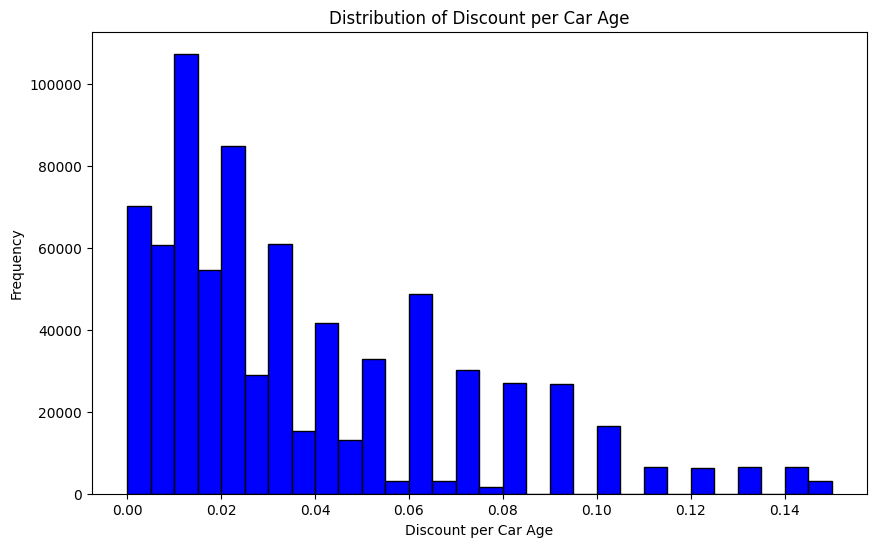

In [97]:
plt.figure(figsize=(10,6))
plt.hist(df['Discount per Car Age'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Discount per Car Age')
plt.xlabel('Discount per Car Age')
plt.ylabel('Frequency')
plt.show()

<b>Potential Insights:</b>

- Understand if discounting older cars effectively increases sales.

- Adjust discounting strategies for aging stock.

In [98]:
# Check
print("Final Shape:", df.shape)
df.info()
df.describe(include="all")

Final Shape: (757027, 35)
<class 'pandas.core.frame.DataFrame'>
Index: 757027 entries, 0 to 803989
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  757027 non-null  datetime64[ns]
 1   Salesperson           757027 non-null  object        
 2   Customer Name         757027 non-null  object        
 3   Customer Age          757027 non-null  float64       
 4   Customer Gender       757027 non-null  object        
 5   Car Make              757027 non-null  object        
 6   Car Model             757027 non-null  object        
 7   Car Year              757027 non-null  int64         
 8   Quantity              757027 non-null  float64       
 9   Sale Price            757027 non-null  float64       
 10  Cost                  757027 non-null  float64       
 11  Profit                757027 non-null  float64       
 12  Discount              757027 non-null

,Date,Salesperson,Customer Name,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,...,Discount_Bracket,Car Age,Profit Margin,Is Weekend,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Customer Age Group,Discount per Car Age
count,757027,757027,757027,757027.000000,757027,757027,757027,757027.00000,757027.000000,757027.000000,...,757027,757027.000000,7.570270e+05,757027.000000,757027,757027,757027,757027,757027,757027.000000
unique,NaN,49,282644,NaN,2,10,50,NaN,NaN,NaN,...,3,NaN,NaN,NaN,2,2,2,2,5,NaN
top,NaN,Eileen Callahan,Michael Johnson,NaN,Male,Toyota,S-Class,NaN,NaN,NaN,...,0-5%,NaN,NaN,NaN,False,False,False,False,41-50,NaN
freq,NaN,15669,309,NaN,402361,119633,57069,NaN,NaN,NaN,...,338565,NaN,NaN,NaN,580177,530852,578688,581364,187040,NaN
mean,2021-05-23 10:09:20.505239296,NaN,NaN,45.023985,NaN,NaN,NaN,2020.99799,2.077745,78097.362348,...,NaN,1.627894,2.206029e-01,0.268696,NaN,NaN,NaN,NaN,NaN,0.035522
min,2018-01-01 00:00:00,NaN,NaN,20.000000,NaN,NaN,NaN,2018.00000,1.000000,9508.000000,...,NaN,0.000000,5.042864e-07,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2019-06-22 00:00:00,NaN,NaN,33.000000,NaN,NaN,NaN,2019.00000,2.000000,55563.400000,...,NaN,0.000000,1.636234e-01,0.000000,NaN,NaN,NaN,NaN,NaN,0.010000
50%,2021-04-27 00:00:00,NaN,NaN,45.000000,NaN,NaN,NaN,2021.00000,2.000000,73899.040000,...,NaN,1.000000,2.338864e-01,0.000000,NaN,NaN,NaN,NaN,NaN,0.025000
75%,2023-02-27 00:00:00,NaN,NaN,57.000000,NaN,NaN,NaN,2023.00000,2.000000,98468.370000,...,NaN,3.000000,2.915229e-01,1.000000,NaN,NaN,NaN,NaN,NaN,0.050000
max,2024-12-31 00:00:00,NaN,NaN,70.000000,NaN,NaN,NaN,2024.00000,3.000000,166229.600000,...,NaN,6.000000,9.993948e-01,1.000000,NaN,NaN,NaN,NaN,NaN,0.150000


In [99]:
# Save the dataset
df.to_csv("car_sales_2018_2024_Cleaned&Engineered_Features.csv", index=False)
print(" Cleaned dataset saved")

 Cleaned dataset saved


# (Section 5.5) EDA After Feature Engineering 
----------- ------------

In [100]:
df = pd.read_csv("car_sales_2018_2024_Cleaned&Engineered_Features.csv")

### Customer Segmentation by Age & Purchase Behavior
- Identify which age group generates the highest average profit per transaction.
- Actionable Improvement: Design targeted promotions for the most profitable demographics.

In [101]:
customer_segment = df.groupby('Customer Age Group').agg({'Quantity':'mean', 'Profit':'mean'})
print(customer_segment)

                    Quantity        Profit
Customer Age Group                        
20-30               2.074929  17836.385671
31-40               2.077448  17829.797408
41-50               2.078534  17859.814418
51-60               2.078881  17844.056871
61-70               2.078569  17816.314968


### Car Age vs Profitability Analysis
- Determine the optimal car age that yields the highest average profit.
- Actionable Improvement: Adjust pricing or discount strategies based on vehicle age.

In [102]:
# Group by Car_Age and calculate average profit
car_age_profit = df.groupby('Car Age')['Profit'].mean()
print(car_age_profit.sort_values(ascending=False).head(10)) # Show top 10 most profitable ages

Car Age
5    22224.114478
4    21692.924506
6    20627.938749
3    19786.651698
2    19476.253256
1    18464.643674
0    14887.377628
Name: Profit, dtype: float64


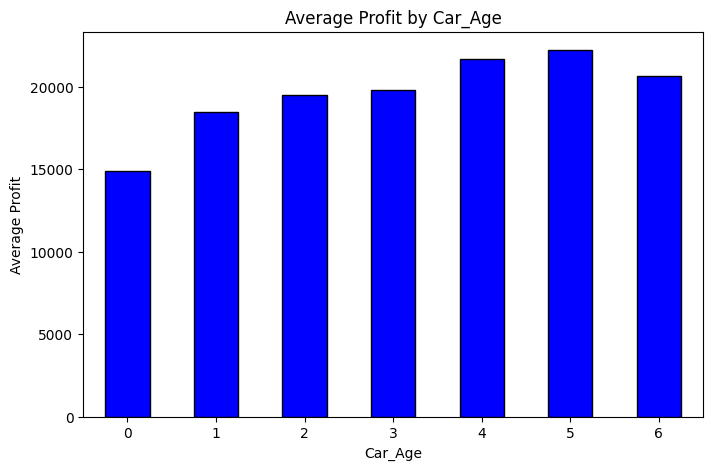

In [103]:
car_age_profit.plot(kind='bar', figsize=(8,5), color='blue', edgecolor='k')

plt.title('Average Profit by Car_Age')
plt.xlabel('Car_Age')
plt.ylabel('Average Profit')
plt.xticks(rotation=0)
plt.show()

<b>Insight:</b> 

Used cars (especially 4–6 years old) generate higher profit margins than brand-new cars. This suggests the dealership could increase focus on sourcing and promoting slightly older used cars, as they offer better profitability compared to new cars.

### Weekend vs Weekday Performance
- Compare total sales volume and profit on weekends vs. weekdays.
- Actionable Improvement: Plan special weekend promotions or events to boost sales further.

In [104]:
weekend_perf = df.groupby('Is Weekend').agg({'Quantity':'sum', 'Profit':'sum'})
weekend_perf.index = weekend_perf.index.map({0: "No", 1: "Yes"})
print(weekend_perf)

             Quantity        Profit
Is Weekend                         
No          1150272.0  9.868841e+09
Yes          422637.0  3.635241e+09


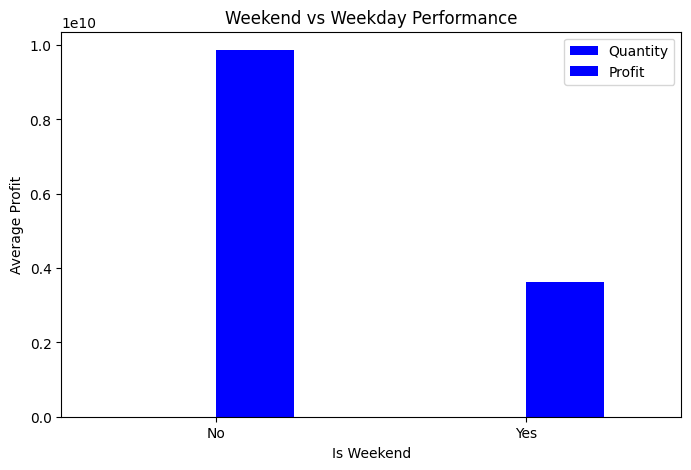

In [105]:
weekend_perf.plot(kind='bar', figsize=(8,5), color='blue')

plt.title('Weekend vs Weekday Performance')
plt.xlabel('Is Weekend' )
plt.ylabel('Average Profit')
plt.xticks(rotation=0)
plt.show()

<b>Insight:</b> 

Sales and profits are significantly higher during weekdays compared to weekends. This suggests that the dealership should focus on increasing weekend promotions or special offers to boost sales during low-traffic periods.

### Customer Age Group & Car Model Preference

- Discover the preferred car models for different customer age groups.
  
- Actionable Improvement: Tailor showroom displays, online ads, and sales pitches to match the preferences of the target age demographic.

In [106]:
age_model_preference = pd.pivot_table(df, values='Quantity', index='Customer Age Group', columns='Car Model', aggfunc='sum', fill_value=0)
# Print a summary, perhaps the top 3 models for each age group
print(age_model_preference.apply(lambda x: x.nlargest(3).index.tolist(), axis=1))

Customer Age Group
20-30    [S-Class, Forte, Elantra]
31-40     [S-Class, Forte, Tucson]
41-50    [S-Class, Equinox, Focus]
51-60       [S-Class, Kona, Pilot]
61-70      [S-Class, Camry, Civic]
dtype: object


<b>Insight:</b>

Across all age groups, the Mercedes S-Class consistently appears as a preferred model, indicating its strong brand appeal and desirability across generations. Meanwhile, younger customers (20–40) tend to prefer compact and affordable models like Forte, Elantra, and Tucson, while older groups (50–70) lean toward family-oriented or practical models such as Pilot, Camry, and Civic.
